# Simple test demonstrations

Just some simple experiments.

In [1]:
# External modules.
import matplotlib.pyplot as plt
import numpy as np
import os

# Internal modules.
from setup.directories import img_path
from setup.results import my_ext
from setup.sunhuber import rho_d1
from setup.utils import makedir_safe

In [2]:
# Create directory to save figures.
makedir_safe(img_path)

## Illustration of $\rho$ and $\widetilde{\rho}$

In [3]:
# Definitions.

def rho_linear(x):
    return x

def rho_tilted(x, gamma=1.0):
    return (np.exp(gamma*x)-1.0)/gamma

def rho_cvar(x, beta=0.5):
    return np.where(x>0.0, x, 0.0)/(1.0-beta)

def rho_quad(x):
    x_shift = x+1.0
    return np.where(x_shift>0.0, x_shift**2/2.0, 0.0)-0.5

def rhotilde_quad(x):
    return x**2/2.0

def rhotilde_sunhuber(x):
    return np.sqrt(x**2+1.0)-1.0

def rhotilde_abs(x):
    return np.absolute(x)

def rhotilde_lcosh(x):
    return np.log(np.cosh(x))


In [4]:
# Computation.

x_values = np.linspace(-1.5, 1.5, 100)

y_rho_linear = rho_linear(x=x_values)
y_rho_tilted = rho_tilted(x=x_values)
y_rho_cvar = rho_cvar(x=x_values)
y_rho_quad = rho_quad(x=x_values)
y_rho_list = [y_rho_linear, y_rho_tilted, y_rho_cvar, y_rho_quad]
y_rho_labels = ["Linear", "Tilted", "CVaR", "Quadratic"]
y_rho_colors = ["C0", "C1", "C2", "C3"]

y_rhotilde_quad = rhotilde_quad(x=x_values)
y_rhotilde_sunhuber = rhotilde_sunhuber(x=x_values)
y_rhotilde_abs = rhotilde_abs(x=x_values)
y_rhotilde_lcosh = rhotilde_lcosh(x=x_values)
y_rhotilde_list = [y_rhotilde_quad, y_rhotilde_sunhuber, y_rhotilde_abs, y_rhotilde_lcosh]
y_rhotilde_labels = ["Quadratic", "Huber-like", "Absolute", "log-cosh"]
y_rhotilde_colors = ["C4", "C5", "C6", "C7"]

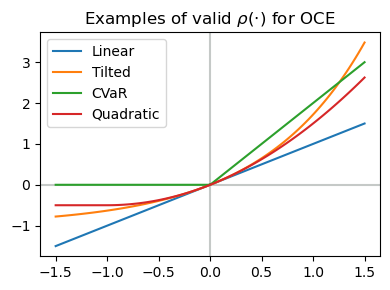

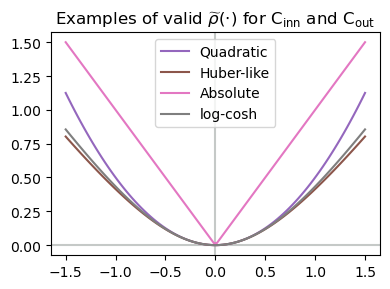

In [5]:
# Visualization.

fig, ax = plt.subplots(1, 1, figsize=(4,3))
ax.axhline(y=0.0, color="xkcd:silver")
ax.axvline(x=0.0, color="xkcd:silver")
for i in range(len(y_rho_list)):
    y_rho = y_rho_list[i]
    ax.plot(x_values, y_rho, linestyle="solid", label=y_rho_labels[i], color=y_rho_colors[i])
ax.set_title(r"Examples of valid $\rho(\cdot)$ for OCE")
ax.legend(loc="best")
plt.tight_layout()
fname = os.path.join(img_path, "demo_valid_rho.{}".format(my_ext))
plt.savefig(fname=fname)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(4,3))
ax.axhline(y=0.0, color="xkcd:silver")
ax.axvline(x=0.0, color="xkcd:silver")
for i in range(len(y_rhotilde_list)):
    y_rhotilde = y_rhotilde_list[i]
    ax.plot(x_values, y_rhotilde, linestyle="solid", label=y_rhotilde_labels[i], color=y_rhotilde_colors[i])
ax.set_title(r"Examples of valid $\widetilde{\rho}(\cdot)$ for $\text{C}_{\text{inn}}$ and $\text{C}_{\text{out}}$")
ax.legend(loc="best")
plt.tight_layout()
fname = os.path.join(img_path, "demo_valid_rhotilde.{}".format(my_ext))
plt.savefig(fname=fname)
plt.show()

## Test of non-monotonic criteria

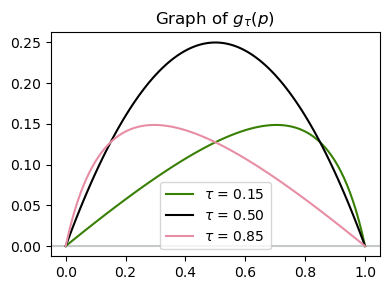

In [6]:
def myfn_1(p, tau=0.5):
    s = (1.-tau)*(1.-p) + tau*p
    t1 = (1.-tau)*(1.-p)*(tau*p/s)**2
    t2 = tau*p*((1.-tau)*(1.-p)/s)**2
    return 2*(t1+t2)

tau_values = [0.15, 0.50, 0.85]
tau_names = ["0.15", "0.50", "0.85"]
my_colors = ["xkcd:dark grass green", "xkcd:black", "xkcd:pig pink"]

# Visualize this function.
p_values = np.linspace(0.0, 1.0, 100)
fig, ax = plt.subplots(1, 1, figsize=(4,3))
ax.axhline(y=0.0, color="xkcd:silver")
#ax.axvline(x=0.0, color="xkcd:silver")
for i, tau_value in enumerate(tau_values):
    ax.plot(p_values, myfn_1(p=p_values, tau=tau_value), label=r"$\tau$ = {}".format(tau_names[i]),
            color=my_colors[i], linestyle="solid")
ax.set_title(r"Graph of $g_{\tau}(p)$")
ax.legend(loc="best")
plt.tight_layout()
fname = os.path.join(img_path, "tests_nonmonotonic_variantile.{}".format(my_ext))
plt.savefig(fname=fname)
plt.show()

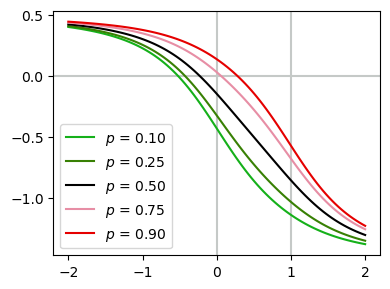

In [7]:
def myfn_2(theta, p):
    out = rho_d1(-theta) + p*(rho_d1(1.-theta)-rho_d1(-theta)) - 0.5
    return out

p_values = [0.10, 0.25, 0.50, 0.75, 0.90]
p_names = ["0.10", "0.25", "0.50", "0.75", "0.90"]
my_colors = ["xkcd:green", "xkcd:dark grass green", "xkcd:black", "xkcd:pig pink", "xkcd:red"]

# Visualize this function.
theta_values = np.linspace(-2.0, 2.0, 100)
fig, ax = plt.subplots(1, 1, figsize=(4,3))
ax.axhline(y=0.0, color="xkcd:silver")
ax.axvline(x=0.0, color="xkcd:silver")
ax.axvline(x=1.0, color="xkcd:silver")
for i, p_value in enumerate(p_values):
    ax.plot(theta_values, myfn_2(theta=theta_values, p=p_value), label=r"$p$ = {}".format(p_names[i]),
            color=my_colors[i], linestyle="solid")
ax.legend(loc="best")
plt.tight_layout()
#fname = os.path.join(img_path, "XXXX.{}".format(my_ext))
#plt.savefig(fname=fname)
plt.show()

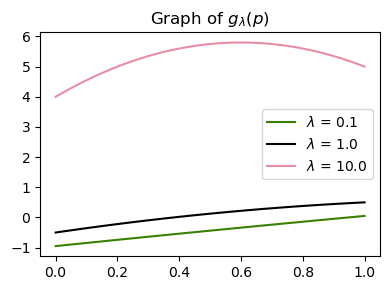

In [8]:
def myquad(x, lam):
    return lam*x**2/2.0

def myfn_3(p, lam):
    return p - 1. + myquad(x=1.-p, lam=lam) + p*(myquad(x=2.-p, lam=lam)-myquad(x=1.-p, lam=lam))

lam_values = [0.1, 1.0, 10.0]
lam_names = ["0.1", "1.0", "10.0"]
my_colors = ["xkcd:dark grass green", "xkcd:black", "xkcd:pig pink"]

# Visualize this function.
p_values = np.linspace(0.0, 1.0, 100)
fig, ax = plt.subplots(1, 1, figsize=(4,3))
#ax.axhline(y=0.0, color="xkcd:silver")
#ax.axvline(x=0.0, color="xkcd:silver")
for i, lam_value in enumerate(lam_values):
    ax.plot(p_values, myfn_3(p=p_values, lam=lam_value), label=r"$\lambda$ = {}".format(lam_names[i]),
            color=my_colors[i], linestyle="solid")
ax.set_title(r"Graph of $g_{\lambda}(p)$")
ax.legend(loc="best")
#ax.set_yticks([-1.0, 0.0, 1.0])
#ax.set_yticklabels([r"-1", r"0", r"1"])
#ax.set_xticks([-1.0, 0.0, 1.0])
#ax.set_xticklabels([r"$\theta-$"+str(1),
#                    r"$\theta$",
#                    r"$\theta+$"+str(1)])
#ax.tick_params(labelsize=my_fontsize)
plt.tight_layout()
fname = os.path.join(img_path, "tests_nonmonotonic_quad.{}".format(my_ext))
plt.savefig(fname=fname)
plt.show()

___